# Modelo de LSTM para TESTES

## Bibliotecas

In [154]:
# Estamos usando a versão 3.10.11 do python

# pip install numpy pandas scikit-learn keras pathlib os-sys

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import timedelta
import os
pd.options.mode.chained_assignment = None

## Ler bases

In [155]:
# Caminho da base
base_diretório = Path(os.getcwd())
diretório_princapl = base_diretório.parent
caminho = diretório_princapl / 'Base' / 'Base Ibovespa Tratada.csv'

# Carrega a base
acao = pd.read_csv(caminho)
acao['Data'] = pd.to_datetime(acao['Data'])

# Ordena por data
acao = acao.sort_values(by="Data")

acao

,Data,Fechamento,Abertura,Máxima,Mínima,Variacao (%)
0,2015-01-05,47517.0,48512.0,48512.0,47264.0,-0.0205
1,2015-01-06,48001.0,47517.0,48061.0,47338.0,0.0102
2,2015-01-07,49463.0,48006.0,49882.0,48006.0,0.0305
3,2015-01-08,49943.0,49463.0,50261.0,49017.0,0.0097
4,2015-01-09,48840.0,49955.0,49955.0,48501.0,-0.0221
...,...,...,...,...,...,...
2609,2025-07-14,135299.0,136187.0,136187.0,134840.0,-0.0065
2610,2025-07-15,135250.0,135298.0,136022.0,134380.0,-0.0004
2611,2025-07-16,135511.0,135250.0,135641.0,134265.0,0.0019
2612,2025-07-17,135565.0,135515.0,135792.0,135016.0,0.0004


## Aplicando modelo de ML

In [156]:
# Encontrar a data máxima disponível no DataFrame
data_maxima = acao['Data'].max()

# Calcular o limite de corte (30 dias antes da data máxima)
data_corte = data_maxima - timedelta(days=43)

# Separar um df no qual vai conter apenas os dado para treinamento
# Que é com base no ano escolhido pelo jogador
df_treinamento = acao.iloc[:-31]

# Apenas cotação dos dados de treinamento 
cotacao_treinamento = df_treinamento['Fechamento'].to_numpy().reshape(-1, 1)

# Cotação dos dados da base toda
cotacao = acao['Fechamento'].to_numpy().reshape(-1, 1)

# Armazenar tamanho dos dados de treinamento
tamanho_dados_treinamento = int(len(cotacao_treinamento) * 1)

print(f"Tamanho dos dados de treinamento: {tamanho_dados_treinamento}\n")

print(cotacao)

Tamanho dos dados de treinamento: 2583

[[ 47517.]
 [ 48001.]
 [ 49463.]
 ...
 [135511.]
 [135565.]
 [133382.]]


In [157]:
#escalar os dados entre 0 e 1, para deixar mais fácil o processamento
#dados em escala pré definidas são mais fáceis de lidar. 
escalador = MinMaxScaler(feature_range=(0, 1))

dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento, :])

dados_entre_0_e_1_teste = escalador.transform(cotacao[tamanho_dados_treinamento: , :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(
    len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))
                                                
dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)

dados_entre_0_e_1

array([[0.09764845],
       [0.1023652 ],
       [0.1166129 ],
       ...,
       [0.95518112],
       [0.95570737],
       [0.93443326]])

In [158]:
dados_para_treinamento = dados_entre_0_e_1[0: tamanho_dados_treinamento, :]

#dados que serão usados para gerar o resultado
treinamento_x = []
#cotação que aconteceu de fato
treinamento_y = []

for i in range(60, len(dados_para_treinamento)):

    #60 ultimos dias
    treinamento_x.append(dados_para_treinamento[i - 60: i, 0])
    #cotacao
    treinamento_y.append(dados_para_treinamento[i, 0])

    if i <= 61:

        print(treinamento_x)
        print(treinamento_y)



[array([0.09764845, 0.1023652 , 0.1166129 , 0.12129067, 0.11054155,
       0.1037198 , 0.10276476, 0.0989056 , 0.10260883, 0.11226648,
       0.09999708, 0.10115677, 0.11428377, 0.116418  , 0.1099081 ,
       0.10797852, 0.10811496, 0.09938312, 0.10003606, 0.09171353,
       0.09895432, 0.11174997, 0.11503416, 0.11438122, 0.11007377,
       0.11583328, 0.10732558, 0.10469434, 0.11729508, 0.1280442 ,
       0.13432021, 0.13445665, 0.13391091, 0.13432996, 0.14010895,
       0.139495  , 0.13900773, 0.13727306, 0.13179617, 0.1345541 ,
       0.12640699, 0.12540321, 0.121661  , 0.11386471, 0.10521084,
       0.11118474, 0.11093136, 0.10816368, 0.11061951, 0.12462359,
       0.13671757, 0.13114323, 0.14101527, 0.1404403 , 0.13652266,
       0.13995303, 0.12749847, 0.12277197, 0.13395963, 0.13305332])]
[np.float64(0.1444748716049623)]
[array([0.09764845, 0.1023652 , 0.1166129 , 0.12129067, 0.11054155,
       0.1037198 , 0.10276476, 0.0989056 , 0.10260883, 0.11226648,
       0.09999708, 0.1011

In [159]:
#transformando as listas em arrays e dando reshape 3d 

treinamento_x, treinamento_y = np.array(treinamento_x), np.array(treinamento_y)

print(treinamento_x)

treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)

print(treinamento_x)

[[0.09764845 0.1023652  0.1166129  ... 0.12277197 0.13395963 0.13305332]
 [0.1023652  0.1166129  0.12129067 ... 0.13395963 0.13305332 0.14447487]
 [0.1166129  0.12129067 0.11054155 ... 0.13305332 0.14447487 0.1522809 ]
 ...
 [0.83371503 0.83674583 0.85308879 ... 0.98809118 0.98464132 0.96995507]
 [0.83674583 0.85308879 0.84806019 ... 0.98464132 0.96995507 0.96761619]
 [0.85308879 0.84806019 0.83819789 ... 0.96995507 0.96761619 0.97501291]]
[[[0.09764845]
  [0.1023652 ]
  [0.1166129 ]
  ...
  [0.12277197]
  [0.13395963]
  [0.13305332]]

 [[0.1023652 ]
  [0.1166129 ]
  [0.12129067]
  ...
  [0.13395963]
  [0.13305332]
  [0.14447487]]

 [[0.1166129 ]
  [0.12129067]
  [0.11054155]
  ...
  [0.13305332]
  [0.14447487]
  [0.1522809 ]]

 ...

 [[0.83371503]
  [0.83674583]
  [0.85308879]
  ...
  [0.98809118]
  [0.98464132]
  [0.96995507]]

 [[0.83674583]
  [0.85308879]
  [0.84806019]
  ...
  [0.98464132]
  [0.96995507]
  [0.96761619]]

 [[0.85308879]
  [0.84806019]
  [0.83819789]
  ...
  [0.9699

In [160]:
#construindo o modelo

modelo = Sequential()

# Primeira camada LSTM
modelo.add(LSTM(100, return_sequences=True, input_shape=(treinamento_x.shape[1], 1)))

# Segunda camada LSTM
modelo.add(LSTM(50, return_sequences=False))

# Camada totalmente conectada com os neuronios
modelo.add(Dense(25))

# Camada final de saída
modelo.add(Dense(1))

treinamento_x.shape[1]

c:\Users\YUPOPIC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60

In [161]:
#copilando o modelo
modelo.compile(optimizer="adam", loss="mean_squared_error") 

In [162]:
#agora com o modelo copilado e os dados, podemos treinar o modelo
#batch size é depois de quantas em quantas amostras o modelo irá otimizar os parâmetros.
#epochs é quantas vezes o algoritmo irá rodar os dados treinamento, aprendendo. 

modelo.fit(treinamento_x, treinamento_y, batch_size=10, epochs=10)

Epoch 1/10


253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0251
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 8.7252e-04
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 6.7946e-04
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 6.6310e-04
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 5.9145e-04
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 5.1610e-04
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 4.6173e-04
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 4.4780e-04
Epoch 9/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 4.2277e-04
Epoch 10/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 3.8778e-04


In [163]:
# Vriar dados de teste

dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 60:, :]

teste_x = []
teste_y = cotacao[tamanho_dados_treinamento: , :] 

for i in range(60, len(dados_teste)):
    teste_x.append(dados_teste[i - 60: i, 0])
    

In [164]:
# Reshape
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [165]:
len(teste_x)

31

In [166]:
#pegando predições do modelo
predicoes = modelo.predict(teste_x)

#tirando a escala dos dados

predicoes = escalador.inverse_transform(predicoes)

predicoes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


array([[133999.56],
       [133617.28],
       [133285.5 ],
       [132945.55],
       [133058.05],
       [133560.56],
       [134280.97],
       [134557.7 ],
       [135435.14],
       [135946.66],
       [136086.11],
       [135363.19],
       [134399.88],
       [133960.38],
       [133260.53],
       [133344.14],
       [133543.88],
       [134563.48],
       [135734.23],
       [136309.3 ],
       [137248.61],
       [138019.27],
       [137668.73],
       [137004.5 ],
       [135690.45],
       [134371.42],
       [133332.2 ],
       [132445.92],
       [131989.25],
       [132007.1 ],
       [132245.33]], dtype=float32)

In [167]:
# Criando o grafico do modelo
treinamento = acao.iloc[:tamanho_dados_treinamento, :]
df_previsao = pd.DataFrame({"Data": acao['Data'].iloc[tamanho_dados_treinamento:],
                        "Fechamento": acao['Fechamento'].iloc[tamanho_dados_treinamento:],
                        "predicoes": predicoes.reshape(len(predicoes))})


In [168]:
treinamento

,Data,Fechamento,Abertura,Máxima,Mínima,Variacao (%)
0,2015-01-05,47517.0,48512.0,48512.0,47264.0,-0.0205
1,2015-01-06,48001.0,47517.0,48061.0,47338.0,0.0102
2,2015-01-07,49463.0,48006.0,49882.0,48006.0,0.0305
3,2015-01-08,49943.0,49463.0,50261.0,49017.0,0.0097
4,2015-01-09,48840.0,49955.0,49955.0,48501.0,-0.0221
...,...,...,...,...,...,...
2578,2025-05-29,138534.0,138869.0,139108.0,137993.0,-0.0025
2579,2025-05-30,137027.0,138546.0,138637.0,136726.0,-0.0109
2580,2025-06-02,136787.0,137026.0,138471.0,136483.0,-0.0018
2581,2025-06-03,137546.0,136787.0,137672.0,136175.0,0.0056


In [169]:
df_previsao

,Data,Fechamento,predicoes
2583,2025-06-05,136236.0,133999.562500
2584,2025-06-06,136102.0,133617.281250
2585,2025-06-09,135699.0,133285.500000
2586,2025-06-10,136436.0,132945.546875
2587,2025-06-11,137128.0,133058.046875
2588,2025-06-12,137800.0,133560.562500
2589,2025-06-13,137213.0,134280.968750
2590,2025-06-16,139256.0,134557.703125
2591,2025-06-17,138840.0,135435.140625
2592,2025-06-18,138717.0,135946.656250


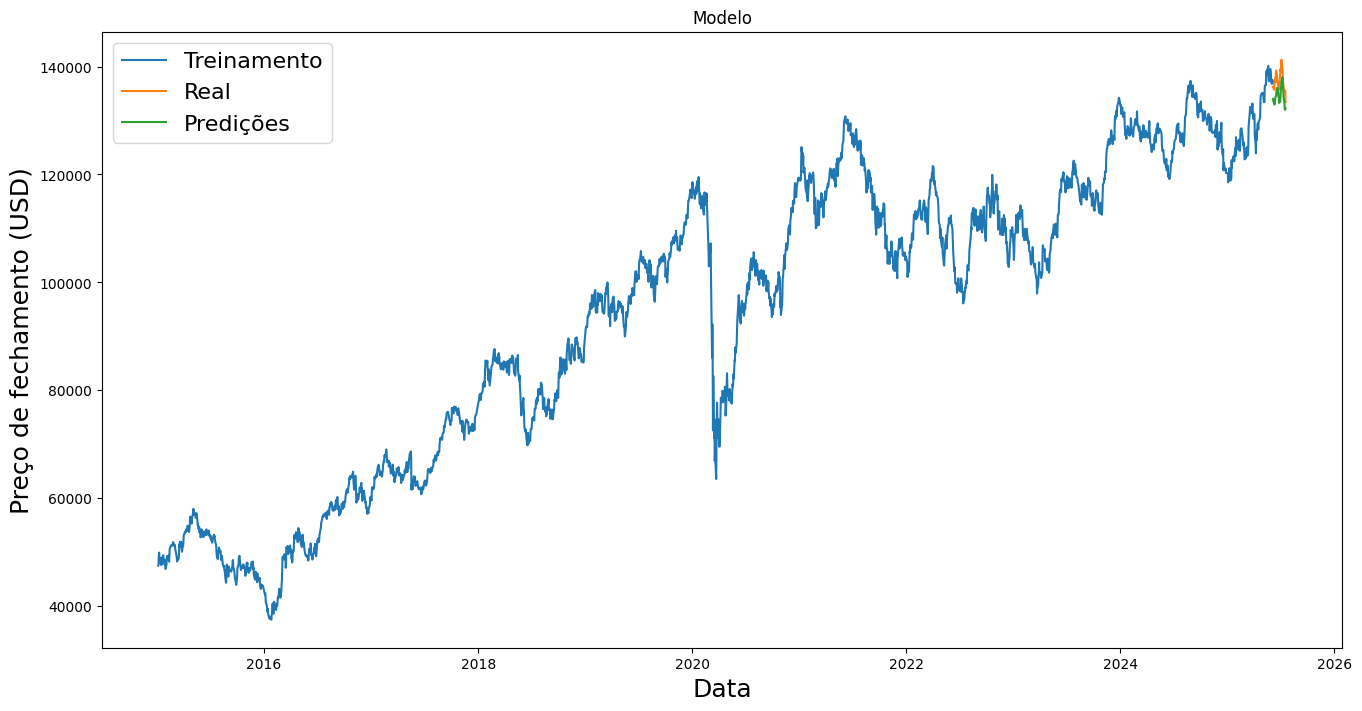

In [170]:
# Setar a data como index dos df (df_previsao e treinamento)
df_previsao.set_index('Data', inplace=True)
treinamento.set_index('Data', inplace=True)

plt.figure(figsize =(16, 8))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel("Preço de fechamento (USD)", fontsize = 18)
plt.plot(treinamento[['Fechamento']])
plt.plot(df_previsao[['Fechamento', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predições'], loc=2, prop={'size': 16})
plt.show()

In [171]:
df_previsao.sort_index()

df_previsao

,Fechamento,predicoes
Data,,
2025-06-05,136236.0,133999.562500
2025-06-06,136102.0,133617.281250
2025-06-09,135699.0,133285.500000
2025-06-10,136436.0,132945.546875
2025-06-11,137128.0,133058.046875
2025-06-12,137800.0,133560.562500
2025-06-13,137213.0,134280.968750
2025-06-16,139256.0,134557.703125
2025-06-17,138840.0,135435.140625


# Metricas para calcular nosso modelo de ML

### Mean Absolute Error (MAE) e Mean Absolute Percentage Error (MAPE)

In [172]:
# A média das diferenças absolutas entre as previsões e os valores reais. Penaliza todos os erros da mesma forma

mae = mean_absolute_error(df_previsao['Fechamento'], df_previsao['predicoes'])

print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2857.71


In [173]:
# Calcular o MAPE
mape = mean_absolute_percentage_error(df_previsao['Fechamento'], df_previsao['predicoes'])

print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f} = {100*mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 0.0208 = 2.08%


### Root Mean Squared Error (RMSE)

In [174]:
# A raiz quadrada da média dos erros ao quadrado. Dá mais peso a grandes erros
rmse = np.sqrt(mean_squared_error(df_previsao['Fechamento'], df_previsao['predicoes']))
mean_price = df_previsao['Fechamento'].mean()

print(f"RMSE: {rmse:.2f}")
print(f"RMSE percentual: {(rmse / mean_price):.6f} = {100*(rmse / mean_price):.4f}%")

RMSE: 3128.25
RMSE percentual: 0.022776 = 2.2776%


### Directional Accuracy (Semanal)

In [175]:
# Calcular a variação percentual semanal para Fechamento e Predicoes
df_previsao['Variação Real (%)'] = df_previsao['Fechamento'].pct_change() * 100
df_previsao['Variação Prevista (%)'] = df_previsao['predicoes'].pct_change() * 100


# Remover NaN (primeira linha não terá variação por não ter valor anterior)
df_previsao = df_previsao.dropna()

# Calcular se a direção do valor previsto foi igual ao real (1 = acertou | 0 = errou)
df_previsao['direcao_correta'] = np.where(
    (df_previsao['Variação Real (%)'] > 0) & (df_previsao['Variação Prevista (%)'] > 0) |
    (df_previsao['Variação Real (%)'] < 0) & (df_previsao['Variação Prevista (%)'] < 0),
    1, 0
)

# Calcular a métrica de Erro de Direção (Directional Accuracy)
directional_accuracy = df_previsao['direcao_correta'].mean()

# Exibir resultados
print(f"Directional Accuracy (diario): {directional_accuracy * 100:.2f}%")

df_previsao

Directional Accuracy (diario): 60.00%


,Fechamento,predicoes,Variação Real (%),Variação Prevista (%),direcao_correta
Data,,,,,
2025-06-06,136102.0,133617.281250,-0.098359,-0.285286,1
2025-06-09,135699.0,133285.500000,-0.296101,-0.248307,1
2025-06-10,136436.0,132945.546875,0.543114,-0.255054,0
2025-06-11,137128.0,133058.046875,0.507198,0.084627,1
2025-06-12,137800.0,133560.562500,0.490053,0.377667,1
2025-06-13,137213.0,134280.968750,-0.425980,0.539386,0
2025-06-16,139256.0,134557.703125,1.488926,0.206089,1
2025-06-17,138840.0,135435.140625,-0.298730,0.652087,0
2025-06-18,138717.0,135946.656250,-0.088591,0.377679,0
